# Exploratory Analysis of the Reviews

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.preprocessing.text import Tokenizer

%matplotlib inline

Using TensorFlow backend.


## Using a downsampled file containing 10% of the english reviews

In [4]:
df = pd.read_csv('./english_reviews_sample.csv')

In [5]:
print(len(df))

410050


In [6]:
tokenizer = Tokenizer(nb_words=10000)
tokenizer.fit_on_texts(df.text.values)
print(tokenizer.document_count)

410050


## 100 most frequent tokens

In [7]:
word_counts = sorted(tokenizer.word_counts.items(), key=lambda k: k[1], reverse=True)
word_counts[:100]

[('the', 2421147),
 ('and', 1643057),
 ('i', 1283122),
 ('a', 1241240),
 ('to', 1165688),
 ('was', 833233),
 ('of', 709958),
 ('it', 605070),
 ('is', 588452),
 ('for', 573201),
 ('in', 551554),
 ('my', 449029),
 ('that', 414184),
 ('with', 395002),
 ('this', 384388),
 ('we', 374846),
 ('they', 372089),
 ('but', 371026),
 ('you', 357793),
 ('on', 339010),
 ('have', 299443),
 ('not', 290735),
 ('had', 278366),
 ('so', 258102),
 ('were', 246172),
 ('at', 245329),
 ('are', 240430),
 ('good', 217793),
 ('food', 217180),
 ('place', 214842),
 ('be', 205792),
 ('as', 203842),
 ('me', 187744),
 ('very', 185361),
 ('great', 184714),
 ('there', 182255),
 ('all', 173672),
 ('if', 168319),
 ('out', 166401),
 ('here', 160416),
 ('like', 159960),
 ('just', 155692),
 ('service', 149104),
 ('our', 147888),
 ('one', 146076),
 ('get', 145047),
 ('time', 144677),
 ('from', 137007),
 ('their', 136890),
 ('when', 132344),
 ('or', 129530),
 ('up', 129393),
 ('would', 129222),
 ('back', 124399),
 ("it's", 122

## Total number of tokens

In [8]:
words = map(lambda w: w[1], word_counts)
print(sum(words))

48161048


## Token coverage by top 10k words

In [9]:
sum(words[:10000]) / float(sum(words))

0.9732147647617635

## Analysis of Sequence Size

In [10]:
seqs = tokenizer.texts_to_sequences(df.text)
seqs_len = map(lambda s: len(s), seqs)

 (-50, 1100),

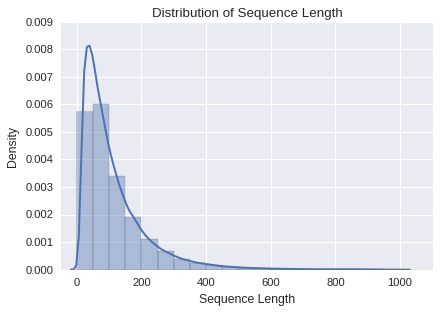

In [17]:
g = sns.distplot(seqs_len, bins=range(0,1100,50))
g.set(xlabel='Sequence Length', ylabel='Density', xlim=[-50,1100], title='Distribution of Sequence Length')

In [18]:
df['seq_len'] = seqs_len

In [19]:
df['is_cool'] = df.cool.apply(lambda v: int(v > 0))
df['is_useful'] = df.useful.apply(lambda v: int(v > 0))
df['is_funny'] = df.funny.apply(lambda v: int(v > 0))

## Distribution of Sequence Lengths by Stars

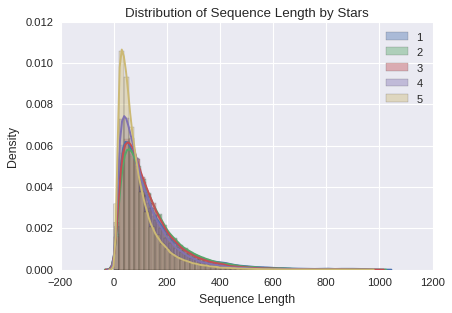

In [20]:
for stars in range(1,6):
    g = sns.distplot(df.groupby('stars').agg({'seq_len': lambda s: list(s)}).loc[stars].seq_len, label=str(stars))
g.set(xlabel='Sequence Length', ylabel='Density', title='Distribution of Sequence Length by Stars')
g.legend()

## Coverage of sequences by 400-token length

In [13]:
for stars in range(1,6):
    sl = sorted(df.groupby('stars').agg({'seq_len': lambda s: list(s)}).loc[stars].seq_len)
    print("%d stars: %.2f%%" % (stars, 100*sum(map(lambda v: v<400, sl)) / float(len(sl))))

1 stars: 94.63%
2 stars: 95.73%
3 stars: 96.81%
4 stars: 97.81%
5 stars: 98.70%


## Distribution of Sequence Lenghts by Usefulness

 (-50, 1100),

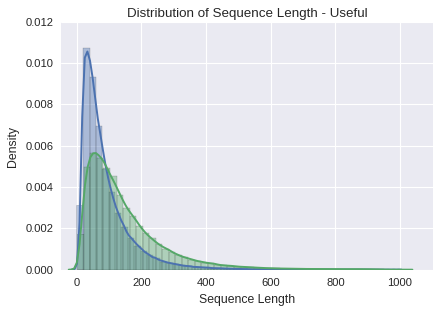

In [22]:
for useful in range(2):
    g = sns.distplot(df.groupby('is_useful').agg({'seq_len': lambda s: list(s)}).loc[useful].seq_len)
g.set(xlabel='Sequence Length', ylabel='Density', xlim=[-50,1100], title='Distribution of Sequence Length - Useful')

## Converage of sequences by 400-token length

In [15]:
for useful in range(2):
    sl = sorted(df.groupby('is_useful').agg({'seq_len': lambda s: list(s)}).loc[useful].seq_len)
    print("%d useful: %.2f%%" % (useful, 100*sum(map(lambda v: v<400, sl)) / float(len(sl))))

0 useful: 98.92%
1 useful: 95.52%


## Distribution of Sequence Lengths by Coolness

 (-50, 1100),

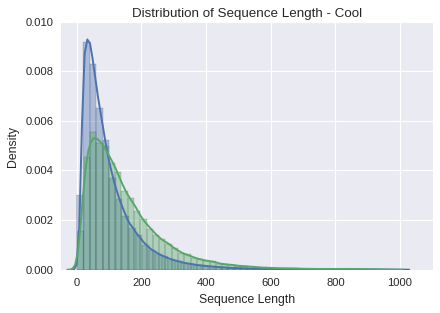

In [23]:
for cool in range(2):
    g = sns.distplot(df.groupby('is_cool').agg({'seq_len': lambda s: list(s)}).loc[cool].seq_len)
g.set(xlabel='Sequence Length', ylabel='Density', xlim=[-50,1100], title='Distribution of Sequence Length - Cool')

## Coverage of sequences by 400-token length

In [17]:
for cool in range(2):
    sl = sorted(df.groupby('is_cool').agg({'seq_len': lambda s: list(s)}).loc[cool].seq_len)
    print("%d cool: %.2f%%" % (cool, 100*sum(map(lambda v: v<400, sl)) / float(len(sl))))

0 cool: 98.19%
1 cool: 95.25%


## Distribution of Sequence Lengths by Funiness

 (-50, 1100),

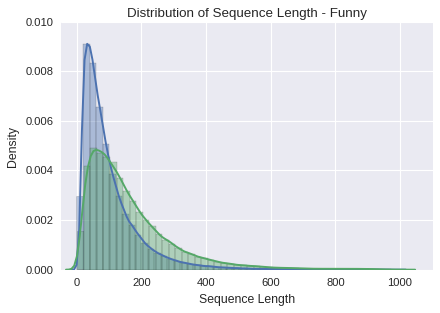

In [24]:
for funny in range(2):
    g = sns.distplot(df.groupby('is_funny').agg({'seq_len': lambda s: list(s)}).loc[funny].seq_len)
g.set(xlabel='Sequence Length', ylabel='Density', xlim=[-50,1100], title='Distribution of Sequence Length - Funny')

## Coverage of sequnces by 400-token length

In [19]:
for funny in range(2):
    sl = sorted(df.groupby('is_funny').agg({'seq_len': lambda s: list(s)}).loc[funny].seq_len)
    print("%d funny: %.2f%%" % (funny, 100*sum(map(lambda v: v<400, sl)) / float(len(sl))))

0 funny: 98.27%
1 funny: 94.15%


## Analysis of Cross-Features

In [26]:
df['is_useful'] = df.useful.apply(lambda v: int(v > 0))
df['is_cool'] = df.cool.apply(lambda v: int(v > 0))
df['is_funny'] = df.funny.apply(lambda v: int(v > 0))

df['is_funny_useful'] = df.apply(lambda row: row.is_funny and row.is_useful, axis=1)
df['is_funny_cool'] = df.apply(lambda row: row.is_funny and row.is_cool, axis=1)
df['is_useful_cool'] = df.apply(lambda row: row.is_useful and row.is_cool, axis=1)
df['is_all'] = df.apply(lambda row: row.is_funny and row.is_cool and row.is_useful, axis=1)

In [27]:
df_dist = df.groupby('stars').agg({'is_funny': sum,
                                   'is_cool': sum,
                                   'is_useful': sum,
                                   'is_funny_useful': sum,
                                   'is_funny_cool': sum,
                                   'is_useful_cool': sum,
                                   'is_all': sum,
                                   'stars': len})

In [28]:
fields = ['is_cool', 'is_useful', 'is_funny', 'is_funny_useful', 'is_funny_cool', 'is_useful_cool', 'is_all']
for field in fields:
    df_dist[field] = df_dist[field] / df_dist.stars

## Distribution of Stars

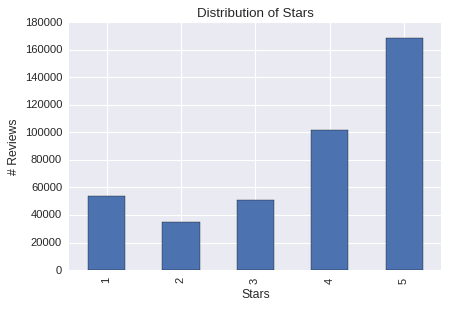

In [29]:
g = df_dist['stars'].plot(kind='bar')
g.set(xlabel='Stars', ylabel='# Reviews', title='Distribution of Stars')

## Proportions of features/cross-features by stars

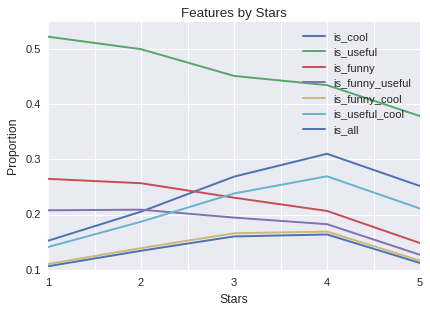

In [35]:
g = df_dist[['is_cool', 'is_useful', 'is_funny', 'is_funny_useful', 'is_funny_cool', 'is_useful_cool', 'is_all']].plot()
g.set(xlabel='Stars', xticklabels=[1,'',2,'',3,'',4,'',5], ylabel='Proportion', title='Features by Stars')

In [25]:
df_dist[['is_cool', 'is_useful', 'is_funny', 'is_funny_useful', 'is_funny_cool', 'is_useful_cool', 'is_all', 'stars']]

,is_cool,is_useful,is_funny,is_funny_useful,is_funny_cool,is_useful_cool,is_all,stars
stars,,,,,,,,
1,0.152495,0.522730,0.264773,0.207754,0.110259,0.141066,0.106146,53982
2,0.205216,0.500099,0.256868,0.208825,0.139103,0.187033,0.134358,35197
3,0.268770,0.451577,0.230621,0.194496,0.166071,0.238263,0.160295,50906
4,0.310270,0.434854,0.206541,0.182522,0.169043,0.269390,0.163837,101418
5,0.251770,0.378624,0.148285,0.126968,0.116377,0.210867,0.112076,168547


## Average sequence length by feature/cross-feature and stars

In [37]:
df_dist_seqlen = df.groupby(['stars', 'is_useful', 'is_cool', 'is_funny']).agg({'seq_len': lambda s: np.mean(list(s))})

In [64]:
ticks = map(lambda v: ''.join(filter(lambda v: v != '', ['useful\n' if v[1] == 1 else '', 'cool\n' if v[2] == 1 else '', 'funny\n' if v[3] == 1 else ''])), df_dist_seqlen.index[:8])

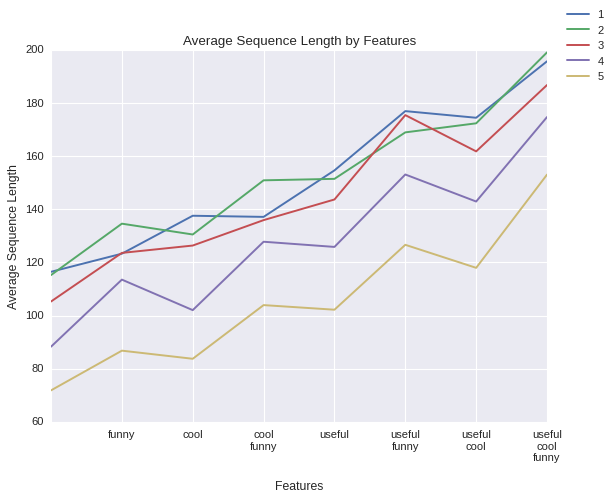

In [66]:
g = sns.plt.figure(figsize=(8, 6))

handles = []
for i in range(1,6):
    handles.append(sns.plt.plot(df_dist_seqlen.loc[i].values, label=str(i))[0])
g.axes[0].set(xlabel='Features', xticklabels=ticks, ylabel='Average Sequence Length', title='Average Sequence Length by Features')
labels = [h.get_label() for h in handles] 
g.legend(handles=handles, labels=labels, loc=1)

## Sequence length vs Stars

In [68]:
df_seqlen_stars = df.groupby('business_id').agg({'business_id': len, 'seq_len': lambda s: np.mean(list(s)), 'stars': np.mean})

In [69]:
df_seqst_10 = df_seqlen_stars[df_seqlen_stars.business_id >= 10].sort_values(by='stars', ascending=False)
print(len(df_seqst_10))

8789


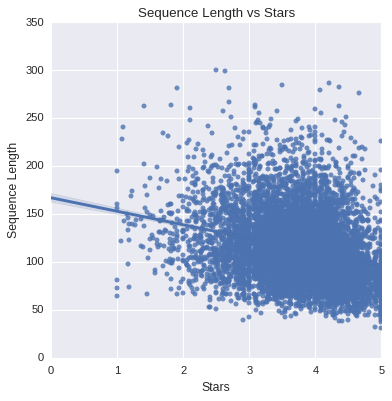

In [71]:
g = sns.lmplot(x='stars', y='seq_len', data=df_seqst_10)
g.set(xlabel='Stars', ylabel='Sequence Length', title='Sequence Length vs Stars', xlim=[0,5])

## Cumulative distribution of reviews over businesses

In [31]:
print(len(df.business_id.unique()))

88217


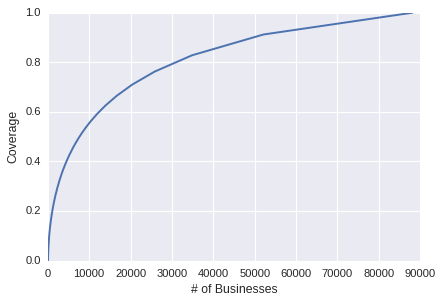

In [79]:
cumulative_rev_count = np.cumsum(sorted(df.groupby('business_id').agg({'user_id': len}).user_id.values, reverse=True))
g = sns.plt.plot(cumulative_rev_count / float(cumulative_rev_count[-1]))
g[0].axes.set(xlabel='# of Businesses', ylabel='Coverage')

## Distribution of review counts by businesses

(array([ 68085.,  11343.,   3696.,   1747.,    972.,    624.,    404.,
           271.,    254.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 <a list of 9 Patch objects>)

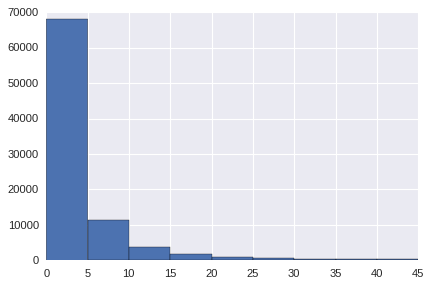

In [97]:
sns.plt.hist(df.groupby('business_id').agg({'user_id': len}).user_id.values, bins=range(0,50,5))

## Cumulative distribution of reviews over users

In [34]:
print(len(df.user_id.unique()))

238409


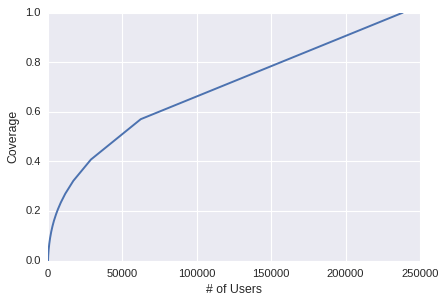

In [80]:
cumulative_rev_count = np.cumsum(sorted(df.groupby('user_id').agg({'business_id': len}).business_id.values, reverse=True))
g = sns.plt.plot(cumulative_rev_count / float(cumulative_rev_count[-1]))
g[0].axes.set(xlabel='# of Users', ylabel='Coverage')

## Distribution of reviews counts by users

(array([  1.76332000e+05,   4.54330000e+04,   8.54900000e+03,
          3.30800000e+03,   1.55500000e+03,   9.04000000e+02,
          5.59000000e+02,   4.13000000e+02,   2.75000000e+02,
          2.04000000e+02,   1.76000000e+02,   1.23000000e+02,
          9.90000000e+01,   8.30000000e+01]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
 <a list of 14 Patch objects>)

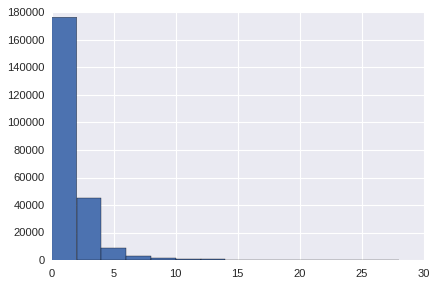

In [96]:
sns.plt.hist(df.groupby('user_id').agg({'business_id': len}).business_id.values, bins=range(0,30,2))

## Distribution of reviews by # of useful clicks
### Percentage of reviews with more than 2 useful clicks

% of Reviews with # Useful > 2: 11.3213


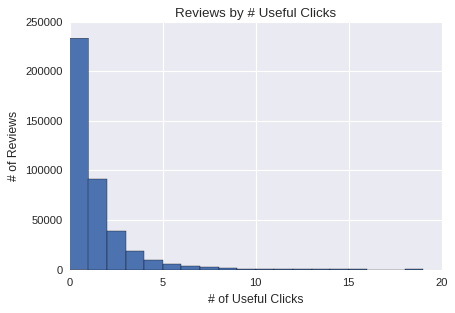

In [106]:
sns.plt.hist(df.useful, bins=range(0,20,1))
sns.plt.xlabel('# of Useful Clicks')
sns.plt.ylabel('# of Reviews')
sns.plt.title('Reviews by # Useful Clicks')
print("%% of Reviews with # Useful > 2: %.4f" % (100*sum(df.useful > 2)/float(len(df))))

## Distribution of reviews by # of cool clicks
### Percentage of reviews with more than 2 cool clicks

% of Reviews with # Cool > 2: 4.7694


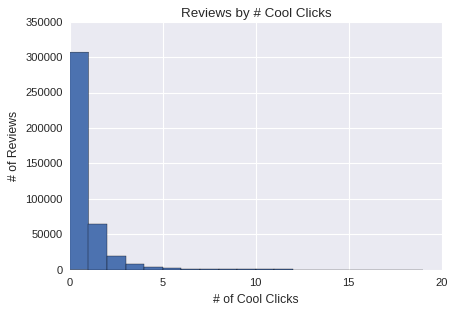

In [107]:
sns.plt.hist(df.cool, bins=range(0,20,1))
sns.plt.xlabel('# of Cool Clicks')
sns.plt.ylabel('# of Reviews')
sns.plt.title('Reviews by # Cool Clicks')
print("%% of Reviews with # Cool > 2: %.4f" % (100*sum(df.cool > 2)/float(len(df))))

## Distribution of reviews by # of funny clicks
### Percentage of reviews with more than 2 funny clicks

% of Reviews with # Funny > 2: 4.0324


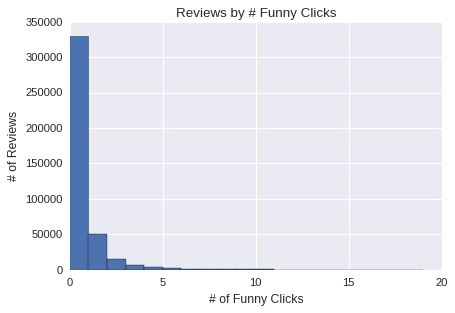

In [108]:
sns.plt.hist(df.funny, bins=range(0,20,1))
sns.plt.xlabel('# of Funny Clicks')
sns.plt.ylabel('# of Reviews')
sns.plt.title('Reviews by # Funny Clicks')
print("%% of Reviews with # Funny > 2: %.4f" % (100*sum(df.funny > 2)/float(len(df))))